# **Analisis Data Spotify 2023**
Disusun oleh: **[Ferrey Adinarta](https://id.linkedin.com/in/ferrey-adinarta-b53911230)**

Dataset : [Top Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)


**Isi Dokumen:**

>**Analisis Meliputi:**
>1.   Tren musik selama tahun 2023
2.   Perbandingan platform (*Spotify, Apple Music, dan Deezer*)
3.   Korelasi antar variabel
>**Pembuatan Model Untuk Prediksi:**





# Import Kaggle Data

In [1]:
from google.colab import files
! pip install -q kaggle

#memasukkan json kaggle
files.upload()

#membuat direktori/folder kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
#download dataset dari kaggle
! kaggle datasets download -d nelgiriyewithana/top-spotify-songs-2023
! unzip top-spotify-songs-2023.zip

  0% 0.00/47.1k [00:00<?, ?B/s]
100% 47.1k/47.1k [00:00<00:00, 1.34MB/s]
Archive:  top-spotify-songs-2023.zip
  inflating: spotify-2023.csv        


# Data Exploring
Mencari tahu secara general datasetnya




In [3]:
#mengimpor semua library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#membaca data
spotify_data = pd.read_csv("/content/spotify-2023.csv", encoding='latin1')

spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
#mencari tahu informasi general dari dataset
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# **Data Preprocessing**
>## Mengubah isi data NaN


In [5]:
#mengecek apakah ada data yang null
any(spotify_data.isna())

True

In [6]:
spotify_data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [7]:
#data-data yang kosong diisi dengan 0
spotify_data['key']=spotify_data['key'].fillna('0')
spotify_data['in_shazam_charts']=spotify_data['in_shazam_charts'].fillna('0')

In [8]:
spotify_data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

>## Menghapus Duplikat

In [9]:
spotify_data.drop_duplicates()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


>## Memperbaiki nama Artist(s) dan Track Name


In [154]:
detect_char=spotify_data[spotify_data['artist(s)_name'].str.contains(r'[@_#$%^&*()<>?/|}{~:]',regex=True)]
detect_char

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
130,Queencard,(G)I-DLE,1,2023,5,15,451,33,9.627375e+07,10,...,130,E,Minor,82,69,83,3,0,27,5
171,"Am I Dreaming (Metro Boomin & A$AP Rocky, Roisee)","A$AP Rocky, Metro Boomin, Roisee",3,2023,6,2,727,16,9.418647e+07,17,...,90,A,Minor,60,13,53,4,0,21,4
229,Seu Brilho Sumiu - Ao Vivo,"Israel & Rodolffo, Mari Fernandez",2,2023,3,1,967,5,1.385177e+08,7,...,154,F#,Major,63,75,92,31,0,91,5
249,Oi Balde - Ao Vivo,Zï¿½ï¿½ Neto & Crist,1,2023,2,14,845,2,1.454584e+08,12,...,108,D,Major,67,55,67,60,0,80,5
367,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",2,2022,11,3,1254,6,2.634533e+08,26,...,158,C#,Major,65,72,95,31,0,92,5
375,Besos Moja2,"Wisin & Yandel, ROSALï¿½",2,2022,9,29,2460,13,3.094840e+08,53,...,94,F,Minor,74,64,73,6,0,10,6
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,3.955914e+08,73,...,96,A,Major,23,19,25,91,0,40,3
476,It's Beginning to Look a Lot Like Christmas (w...,"Perry Como, The Fontane Sisters, Mitchell Ayre...",3,1958,1,1,6290,0,2.959985e+08,89,...,113,G,Major,73,72,32,77,0,15,5
601,Vai Lï¿½ï¿½ Em Casa,"Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &",2,2021,10,22,772,0,2.638945e+08,7,...,158,G#,Minor,46,62,83,53,0,97,28
638,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,"Riton, Nightcrawlers, Mufasa & Hypeman, Dopamine",4,2021,1,15,12043,0,8.637566e+08,209,...,123,D,Major,82,80,86,1,0,30,13


Beberapa nama artist dan lagu yang character:


1.   ë dan tidak terformat dengan baik dan menjadi karakter ï¿½ï¿½
2.   ÍA dan tidak terformat dengan baik dan menjadi karakter ï¿½

Maka saya akan mengubah formatnya

In [163]:
clean_column=['artist(s)_name','track_name']
for column in clean_column:
  spotify_data[column]=spotify_data[column].str.replace('ï¿½ï¿½','ë')
  spotify_data[column]=spotify_data[column].str.replace('ï¿½','ÍA')

detect_char=spotify_data[spotify_data['artist(s)_name'].str.contains(r'[@_#$%^&*()<>?/|}{~:]',regex=True)]
detect_char

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
130,Queencard,(G)I-DLE,1,2023,5,15,451,33,9.627375e+07,10,...,130,E,Minor,82,69,83,3,0,27,5
171,"Am I Dreaming (Metro Boomin & A$AP Rocky, Roisee)","A$AP Rocky, Metro Boomin, Roisee",3,2023,6,2,727,16,9.418647e+07,17,...,90,A,Minor,60,13,53,4,0,21,4
229,Seu Brilho Sumiu - Ao Vivo,"Israel & Rodolffo, Mari Fernandez",2,2023,3,1,967,5,1.385177e+08,7,...,154,F#,Major,63,75,92,31,0,91,5
249,Oi Balde - Ao Vivo,Zë Neto & Crist,1,2023,2,14,845,2,1.454584e+08,12,...,108,D,Major,67,55,67,60,0,80,5
367,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",2,2022,11,3,1254,6,2.634533e+08,26,...,158,C#,Major,65,72,95,31,0,92,5
375,Besos Moja2,"Wisin & Yandel, ROSALÍA",2,2022,9,29,2460,13,3.094840e+08,53,...,94,F,Minor,74,64,73,6,0,10,6
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,3.955914e+08,73,...,96,A,Major,23,19,25,91,0,40,3
476,It's Beginning to Look a Lot Like Christmas (w...,"Perry Como, The Fontane Sisters, Mitchell Ayre...",3,1958,1,1,6290,0,2.959985e+08,89,...,113,G,Major,73,72,32,77,0,15,5
601,Vai Lë Em Casa,"Marëlia Mendonëa, George Henrique &",2,2021,10,22,772,0,2.638945e+08,7,...,158,G#,Minor,46,62,83,53,0,97,28
638,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,"Riton, Nightcrawlers, Mufasa & Hypeman, Dopamine",4,2021,1,15,12043,0,8.637566e+08,209,...,123,D,Major,82,80,86,1,0,30,13


>## Outlier
Saya akan mengidentifikasi dan menghapus outlier pada kolom yang kritikal dalam analisis saya yaitu kolom streams. Karena kolom streams dapat menentukan popularitas dan tren musik di tahun 2023.

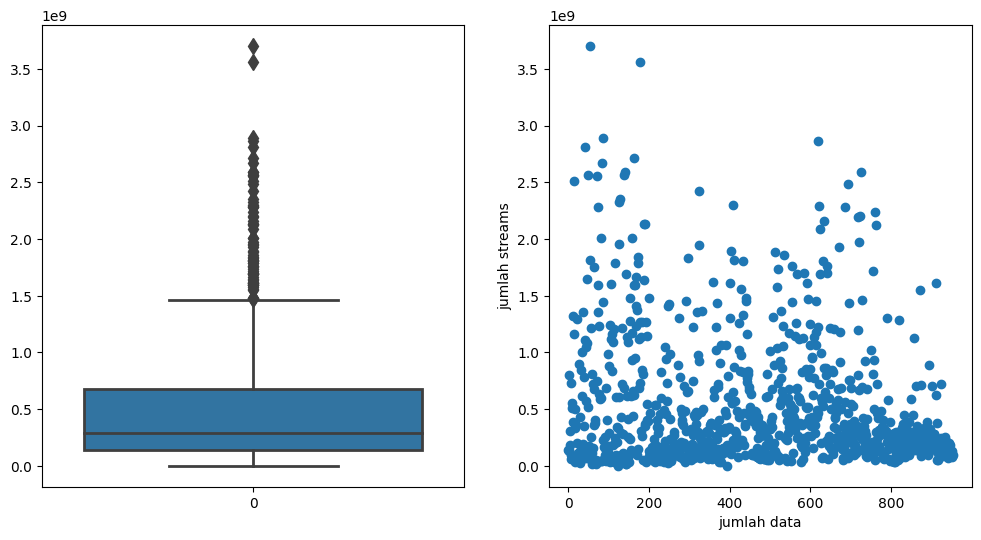

In [164]:
#identifikasi outlier dengan bantuan visualisasi seaborn dan matplotlib
spotify_data['streams'] =  pd.to_numeric(spotify_data['streams'], errors='coerce')
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(spotify_data['streams'], linewidth=2, fliersize=8)

plt.subplot(1,2,2)
x_axis = range(len(spotify_data))
plt.scatter(x_axis,spotify_data['streams'])
plt.xlabel('jumlah data')
plt.ylabel('jumlah streams')
plt.show()

In [167]:
#pemberian upper limit dengan IQR untuk menghilangkan outlier
IQR = spotify_data['streams'].quantile(0.75) - spotify_data['streams'].quantile(0.25)
upperlimit = spotify_data['streams'].mean() + 1.5 * IQR
lowerlimit = spotify_data['streams'].mean() - 1.5 * IQR

spotify_data_clean=spotify_data[(spotify_data['streams']<=upperlimit) & (spotify_data['streams']>=lowerlimit)]
spotify_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            859 non-null    object 
 1   artist(s)_name        859 non-null    object 
 2   artist_count          859 non-null    int64  
 3   released_year         859 non-null    int64  
 4   released_month        859 non-null    int64  
 5   released_day          859 non-null    int64  
 6   in_spotify_playlists  859 non-null    int64  
 7   in_spotify_charts     859 non-null    int64  
 8   streams               859 non-null    float64
 9   in_apple_playlists    859 non-null    int64  
 10  in_apple_charts       859 non-null    int64  
 11  in_deezer_playlists   859 non-null    object 
 12  in_deezer_charts      859 non-null    int64  
 13  in_shazam_charts      859 non-null    object 
 14  bpm                   859 non-null    int64  
 15  key                   8

Terlihat bahwa data sudah semakin terdistribusi dengan baik dan outlier sudah dihilangkan. Jumlah rows menjadi 859 dari 952

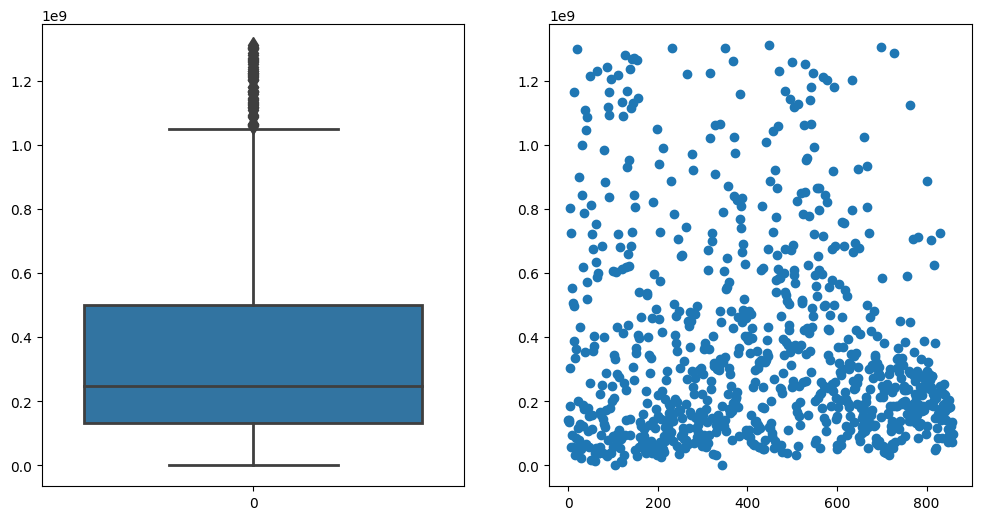

In [168]:
#hasil filer IQR terhadap outlier
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(spotify_data_clean['streams'], linewidth=2, fliersize=8)

plt.subplot(1,2,2)
x_axis = range(len(spotify_data_clean))
plt.scatter(x_axis,spotify_data_clean['streams'])
plt.show()

# **Analisis Data**


>## **Tren Musik di Tahun 2023**

>> 1. Artist dengan stream terbanyak di tahun 2023?


<ipython-input-169-24603ffd0b57>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='artist(s)_name',y='streams', data=top_5_songs, size=10, palette='deep')


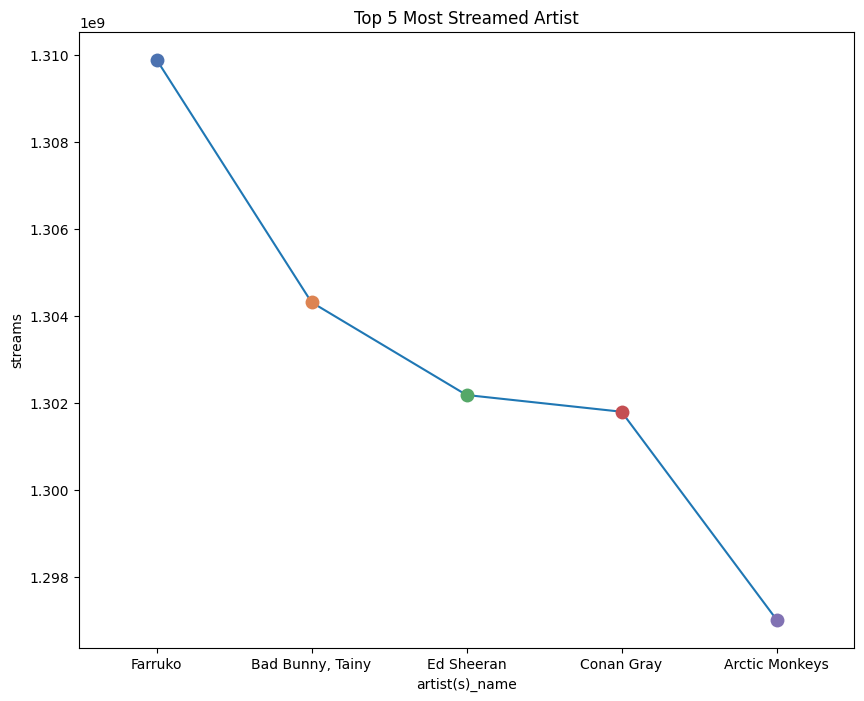

In [169]:
top_5_songs = spotify_data_clean[['artist(s)_name','streams']].sort_values(by='streams', ascending=False).head()
plt.figure(figsize=(10,8))
sns.lineplot(x='artist(s)_name',y='streams', data=top_5_songs)
sns.swarmplot(x='artist(s)_name',y='streams', data=top_5_songs, size=10, palette='deep')
plt.title('Top 5 Most Streamed Artist')
plt.show()

In [170]:
farruko=spotify_data_clean.loc[spotify_data_clean['artist(s)_name']=='Farruko','track_name']
farruko

507    Pepas
Name: track_name, dtype: object

>> 2. Bulan apa dengan jumlah musik yang dirilis terbanyak?


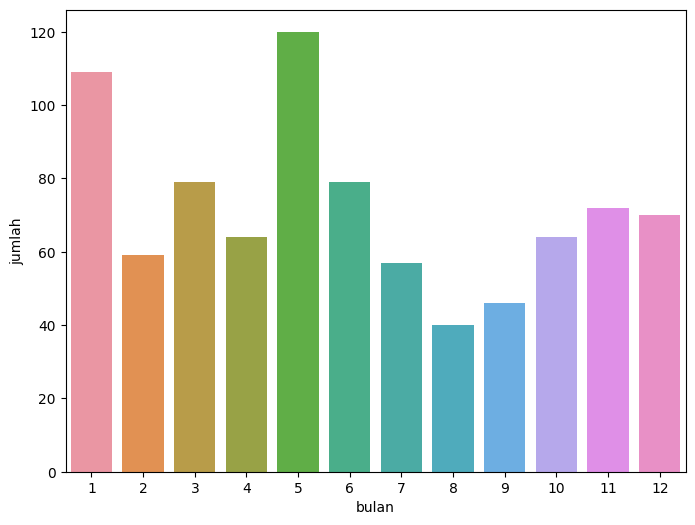

In [171]:
jumlah_rilis=spotify_data_clean['released_month'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=jumlah_rilis.index,y=jumlah_rilis)
plt.xlabel('bulan')
plt.ylabel('jumlah')
plt.show()

>>

Di bulan Mei jumlah musik yang dirilis adalah 120 lagu hits. Saya ingin menganalisis secara lebih mendalam mengenai tipe lagu yang mendominasi berdasarkan energy, danceablity, dan acousticness level di bulan Mei.

In [172]:
energy = spotify_data_clean.loc[spotify_data_clean['released_month']==5,'energy_%'].mean()
danceability = spotify_data_clean.loc[spotify_data_clean['released_month']==5,'danceability_%'].mean()
acousticness = spotify_data_clean.loc[spotify_data_clean['released_month']==5,'acousticness_%'].mean()

print(f"Average energy: {energy}")
print(f"Average danceability: {danceability}")
print(f"Average acousticness: {acousticness}")


Average energy: 62.858333333333334
Average danceability: 68.84166666666667
Average acousticness: 33.625


>Rata-rata lagu yang dirilis di bulan Mei memungkinkan memiliki genre pop dan tempo yang lumayan tinggi karena persentase danceability dan energy berada di atas 50 persen.

> Mencari tahu korelasi antar variabel-variabel detail lagu

<ipython-input-173-bf98b3163172>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = features.corr()


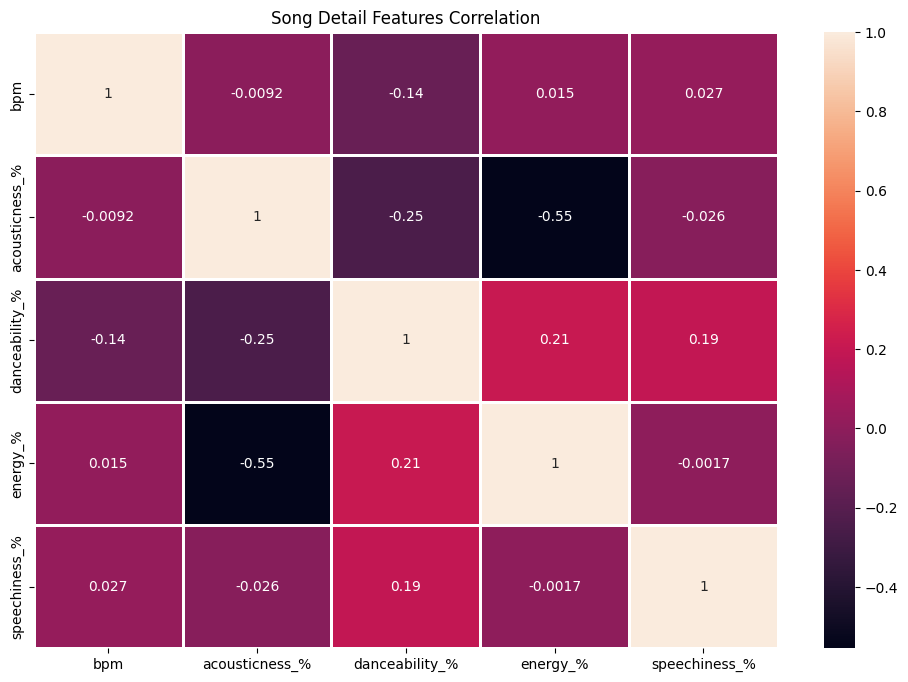

In [173]:
features = spotify_data_clean[['bpm','acousticness_%','danceability_%','energy_%','speechiness_%','key','mode']]
corr = features.corr()

plt.figure(figsize=(12,8))
plt.title('Song Detail Features Correlation')
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

**Kesimpulan:**


1.   Bulan Mei merupakan bulan dengan jumlah rilis lagu terbanyak, tipe lagu yang banyak dirilis di bulan Mei adalah lagu dengan energy dan danceability yang cukup tinggi (diatas 50%).

2.   Korelasi negatif tertinggi antara variabel acousticness level dengan energy level yang menandakan bahwa lagu dengan acousticness level yang tinggi akan menurunkan level energinya dan begitu sebaliknya. Lagu-lagu akustik memiliki level energi yang rendah atau mood yang santai, sedangkan lagu-lagu pop memiliki level energi yang tinggi dan mood yang energetik.

3. Korelasi positif tertinggi antara variabel danceability dan energi level yang menandakan bahwa lagu-lagu pop akan lebih cocok dan sering dipakai untuk menari


>## **Perbandingan Platform Musik**

> 1. Perbandingan performa lagu di 3 platform berdasarkan charts di masing-masing platform


In [174]:
#lagu yang akan saya telusuri adalah lagu terbanyak jumlah streamsnya yaitu Pepas by Farruko
charts=spotify_data_clean.loc[spotify_data_clean['track_name']=='Pepas',['in_apple_charts','in_spotify_charts','in_deezer_charts']]
charts = charts.rename(columns={
    'in_apple_charts': 'Apple Charts',
    'in_spotify_charts': 'Spotify Charts',
    'in_deezer_charts': 'Deezer Charts'
})
charts

,Apple Charts,Spotify Charts,Deezer Charts
507,109,17,20


> 2. Lagu dengan charts dan jumlah streams tertinggi di masing-masing platform

In [222]:
#spotify filter
spotify=spotify_data_clean[spotify_data_clean['in_spotify_charts'] == 1].sort_values('streams', ascending=False).head()
spotify_list=spotify['track_name'].tolist()
#apple music filter
apple=spotify_data_clean[spotify_data_clean['in_apple_charts'] == 1].sort_values('streams', ascending=False).head()
apple_list=apple['track_name'].tolist()
#deezer filter
deezer=spotify_data_clean[spotify_data_clean['in_deezer_charts'] == 1].sort_values('streams', ascending=False).head()
deezer_list=deezer['track_name'].tolist()

top_songs_all_platform= pd.DataFrame(
    {
        'Top 5 Spotify':spotify_list,
        'Top 5 Apple Music' :apple_list,
        'Top 5 Deezer':deezer_list
    },
    index=[1,2,3,4,5]
)
top_songs_all_platform

,Top 5 Spotify,Top 5 Apple Music,Top 5 Deezer
1,Golden,Heather,Danza Kuduro
2,X ëLTIMA,Running Up That Hill (A Deal With God),We Found Love
3,Music For a Sushi Restaurant,Get Lucky - Radio Edit,505
4,Un Verano Sin Ti,Swim,Still D.R.E.
5,ELEVEN,Mount Everest,In Da Club


Perbandingan tipe lagu pada lagu-lagu top 5 di ketiga platform

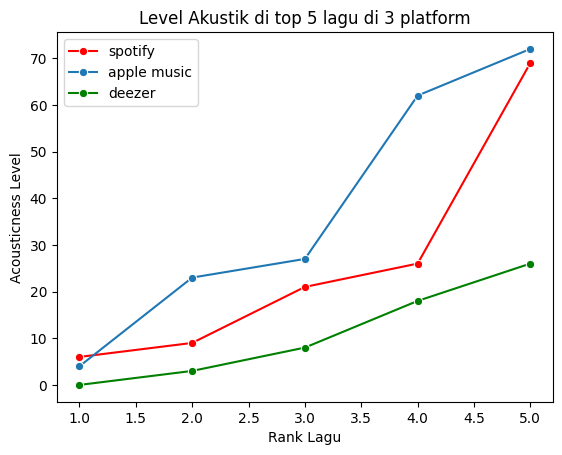

In [256]:
#mengambil acousticness level top 5 lagu di masing masing platform
spotify_features=spotify['acousticness_%'].sort_values()
apple_features=apple['acousticness_%'].sort_values()
deezer_features=deezer['acousticness_%'].sort_values()

sns.lineplot(x=top_songs_all_platform.index, y=spotify_features, data=top_songs_all_platform, color='r', label='spotify', marker='o')
sns.lineplot(x=top_songs_all_platform.index, y=apple_features, data=top_songs_all_platform, label='apple music', marker='o')
sns.lineplot(x=top_songs_all_platform.index, y=deezer_features, data=top_songs_all_platform,color='g', label='deezer', marker='o')

plt.title('Level Akustik di top 5 lagu di 3 platform')
plt.xlabel('Rank Lagu')
plt.ylabel('Acousticness Level')
plt.legend()
plt.show()

**Kesimpulan:**
1. Lagu dengan stream terbanyak belum tentu memiliki charts yang tinggi. Seperti contohnya lagu Pepas yang memiliki jumlah streams terbanyak ternyata tidak menempati charts top 5 di ketiga platform

2. Setiap platform memiliki lagu di chartsnya yang berbeda beda, mulai dari artist pembuatnya hingga jenis lagunya

3. Level akustik yang tinggi dicapai oleh platform apple music yang menandakan bahwa pengguna platform tersebut suka mendengarkan lagu akustik di platformnya. Platform Spotify memiliki akustik level yang beragam yang menandakan beragam macam lagu yang berada di platform tersebut. Platform Deezer memiliki lagu-lagu dengan level akustik yang rendah di chartsnya, menunjukan bahwa banyak lagu pop yang lebih terkenal di platform tersebut
